In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statistics
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV

# Import data 

The following data was preprocessed in R, by merging eset_HTA20 and anoSC1_v11_nokey.csv

In [2]:
alldata = pd.read_csv("alldata.csv")

Check the data

In [3]:
alldata.head()

,Unnamed: 0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,...,g_32827,g_32828,g_32829,g_32830,SampleID,GA,Batch,Set,Train,Platform
0,1,6.062215,3.796484,5.849338,3.567779,6.166815,4.443027,5.836522,6.330018,4.922339,...,8.972873,10.440245,12.101476,13.695705,Tarca_001_P1A01,11.0,1,PRB_HTA,1,HTA20
1,2,6.125023,3.805305,6.191562,3.452524,5.678373,4.773199,6.143398,5.601745,4.711765,...,9.376194,10.845176,12.370891,13.635522,Tarca_003_P1A03,NaN,1,PRB_HTA,0,HTA20
2,3,5.875502,3.450245,6.550525,3.316134,6.185059,4.393488,5.898364,6.137984,4.628124,...,8.843612,10.493416,12.295786,13.616688,Tarca_004_P1A04,32.6,1,PRB_HTA,1,HTA20
3,4,6.126131,3.628411,6.421877,3.432451,5.633757,4.623783,6.019792,5.787502,4.796283,...,9.191471,10.879879,12.249936,13.524328,Tarca_005_P1A05,30.6,1,PRB_HTA,1,HTA20
4,5,6.146466,3.446812,6.260962,3.477162,5.313198,4.422651,6.407699,5.830437,4.726488,...,9.247768,10.754316,12.245458,13.509353,Tarca_006_P1A06,NaN,1,PRB_HTA,0,HTA20


# Make train and test dataset

In [4]:
X_train = alldata.loc[alldata['Train'] == 1, 'g_1':'g_32830'].values
X_train_df = alldata.loc[alldata['Train'] == 1, 'g_1':'g_32830']

In [5]:
y_train = alldata.loc[alldata['Train'] == 1, 'GA'].values
y_train_df = alldata.loc[alldata['Train'] == 1, 'GA']

In [6]:
# X_test = alldata.loc[alldata['Train'] == 0, 'g_1':'g_32830'].values
X_test_df = alldata.loc[alldata['Train'] == 0, 'g_1':'g_32830']
ID_test = alldata.loc[alldata['Train'] == 0, 'SampleID'].values

In [8]:
print(X_train.shape)
print(y_train.shape)

(367, 32830)
(367,)


# EDA

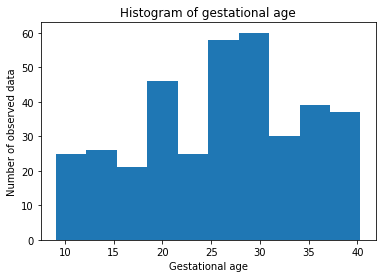

In [9]:
_ = plt.hist(y_train)
_ = plt.xlabel("Gestational age")
_ = plt.ylabel("Number of observed data")
_ = plt.title("Histogram of gestational age")
plt.show()

# PCA

In [10]:
scaler = StandardScaler(with_mean = True, with_std = True)
X_train_s = scaler.fit_transform(X_train)
X_train_s[0:5, :]

array([[-0.5355161 ,  0.93769594, -2.60407574, ..., -1.44925201,
        -0.64919364,  0.91160949],
       [-1.74961531, -1.40487588,  2.09164449, ..., -1.24280917,
         0.36426473,  0.28751022],
       [-0.11989721, -0.19944457,  1.23011703, ...,  0.25768861,
         0.12512356, -0.44197234],
       [-0.06512395, -0.98485927, -0.55783002, ..., -1.50140077,
        -0.58218925, -0.49643817],
       [ 0.94262878, -0.60686684,  0.73586595, ..., -1.76407312,
        -1.41313305, -2.52240789]])

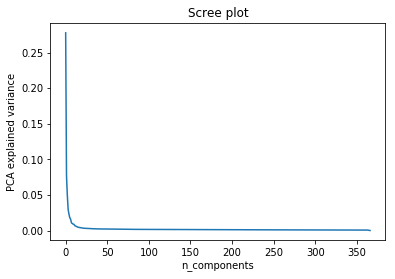

In [11]:
pca = PCA()
pca.fit(X_train_s)

_ = plt.plot(pca.explained_variance_ratio_)
_ = plt.title("Scree plot")
_ = plt.xlabel("n_components")
_ = plt.ylabel("PCA explained variance")

plt.show()

In [12]:
print(pca.explained_variance_ratio_[0:5])
print(pca.explained_variance_ratio_[0:20].sum().round(3))
print(pca.explained_variance_ratio_[0:250].sum().round(3))

[0.27777854 0.07700699 0.04920566 0.0294135  0.02265843]
0.572
0.907


PCA as dimensionality reduction

In [13]:
pca = PCA(n_components = 1)
pca.fit(X_train_s)
X_pca = pca.transform(X_train_s)
print("original shape:", X_train_s.shape)
print("transformed shape:", X_pca.shape)

original shape: (367, 32830)
transformed shape: (367, 1)


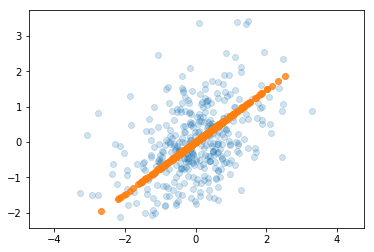

In [14]:
X_new = pca.inverse_transform(X_pca)
_ = plt.scatter(X_train_s[:,0], X_train_s[:,1], alpha = 0.2)
_ = plt.scatter(X_new[:,0], X_new[:,1], alpha = 0.8)
_ = plt.axis('equal')
plt.show()

# Principal components regression 

In [15]:
pca = PCA()
X_train_s = scaler.fit_transform(X_train)
X_pca = pca.fit_transform(X_train_s)[:, :1]
reg = LinearRegression()
reg.fit(X_pca, y_train)
pred = reg.predict(X_pca)